In [19]:
import numpy as np;
import matplotlib.pyplot as plt;
from mpl_toolkits import mplot3d
%matplotlib inline

# Working with Urban16 Dataset

### reading Ground Truth

In [20]:
vehicle_pose = np.genfromtxt('../../urban16/global_pose.csv', delimiter=',');

The $P$ matrix represented in the global_pose.csv is a 3x4 matrix that represents the transform of the vehicle from the global coordinate system. <br><br>

$$P = \begin{bmatrix} r_{1,1} & r_{1,2} & r_{1,3} & t_x \\
                      r_{2,1} & r_{2,2} & r_{2,3} & t_y \\
                      r_{3,1} & r_{3,2} & r_{3,3} & t_z \end{bmatrix}$$ <br><br>
$r$ represents the 3d rotation matrix while the $t$ vector represents the translation vector <br>

In [21]:
#vehicle_pose is HUGE
first_pose = vehicle_pose[0,1:]
print(first_pose)

[-7.99652676e-01  6.00397446e-01 -8.86030071e-03  3.16097936e+05
 -6.00401636e-01 -7.99694785e-01 -2.47526487e-03  4.15514564e+06
 -8.57167898e-03  3.34038687e-03  9.99957683e-01  1.60974129e+01]


In [22]:
transform = first_pose.reshape(3,4)

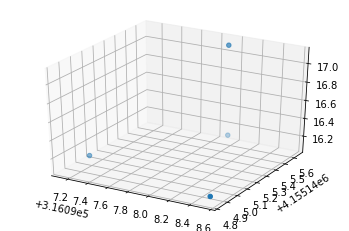

In [31]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x = np.array([[1,0,0,1]]).T
y = np.array([[0,1,0,1]]).T
z = np.array([[0,0,1,1]]).T
zer = np.array([[0,0,0,1]]).T
pts = np.array([transform @ x, transform @ y, transform @ z, transform@zer]).reshape(4,3).T
ax.scatter(pts[0,:], pts[1,:], pts[2,:])
plt.show()

In [47]:
### SANITY CHECK
vecA = z - zer
vecB = y - zer
vecC = x - zer

#ideally all of the vectors created should be 90 deg away from each other, making their dot prod ~ 0
assert (vecA.T @ vecB)[0] == 0
assert (vecC.T @ vecB)[0] == 0
assert (vecA.T @ vecC)[0] == 0

## Plotting Vehicle Trajectory

In [139]:
print(vehicle_pose.shape)

(308734, 13)


In [146]:
n = 308_000
poses = vehicle_pose[:n,1:]
poses = poses.reshape(n, 3,4)
poses = poses[:n, :, 3].T

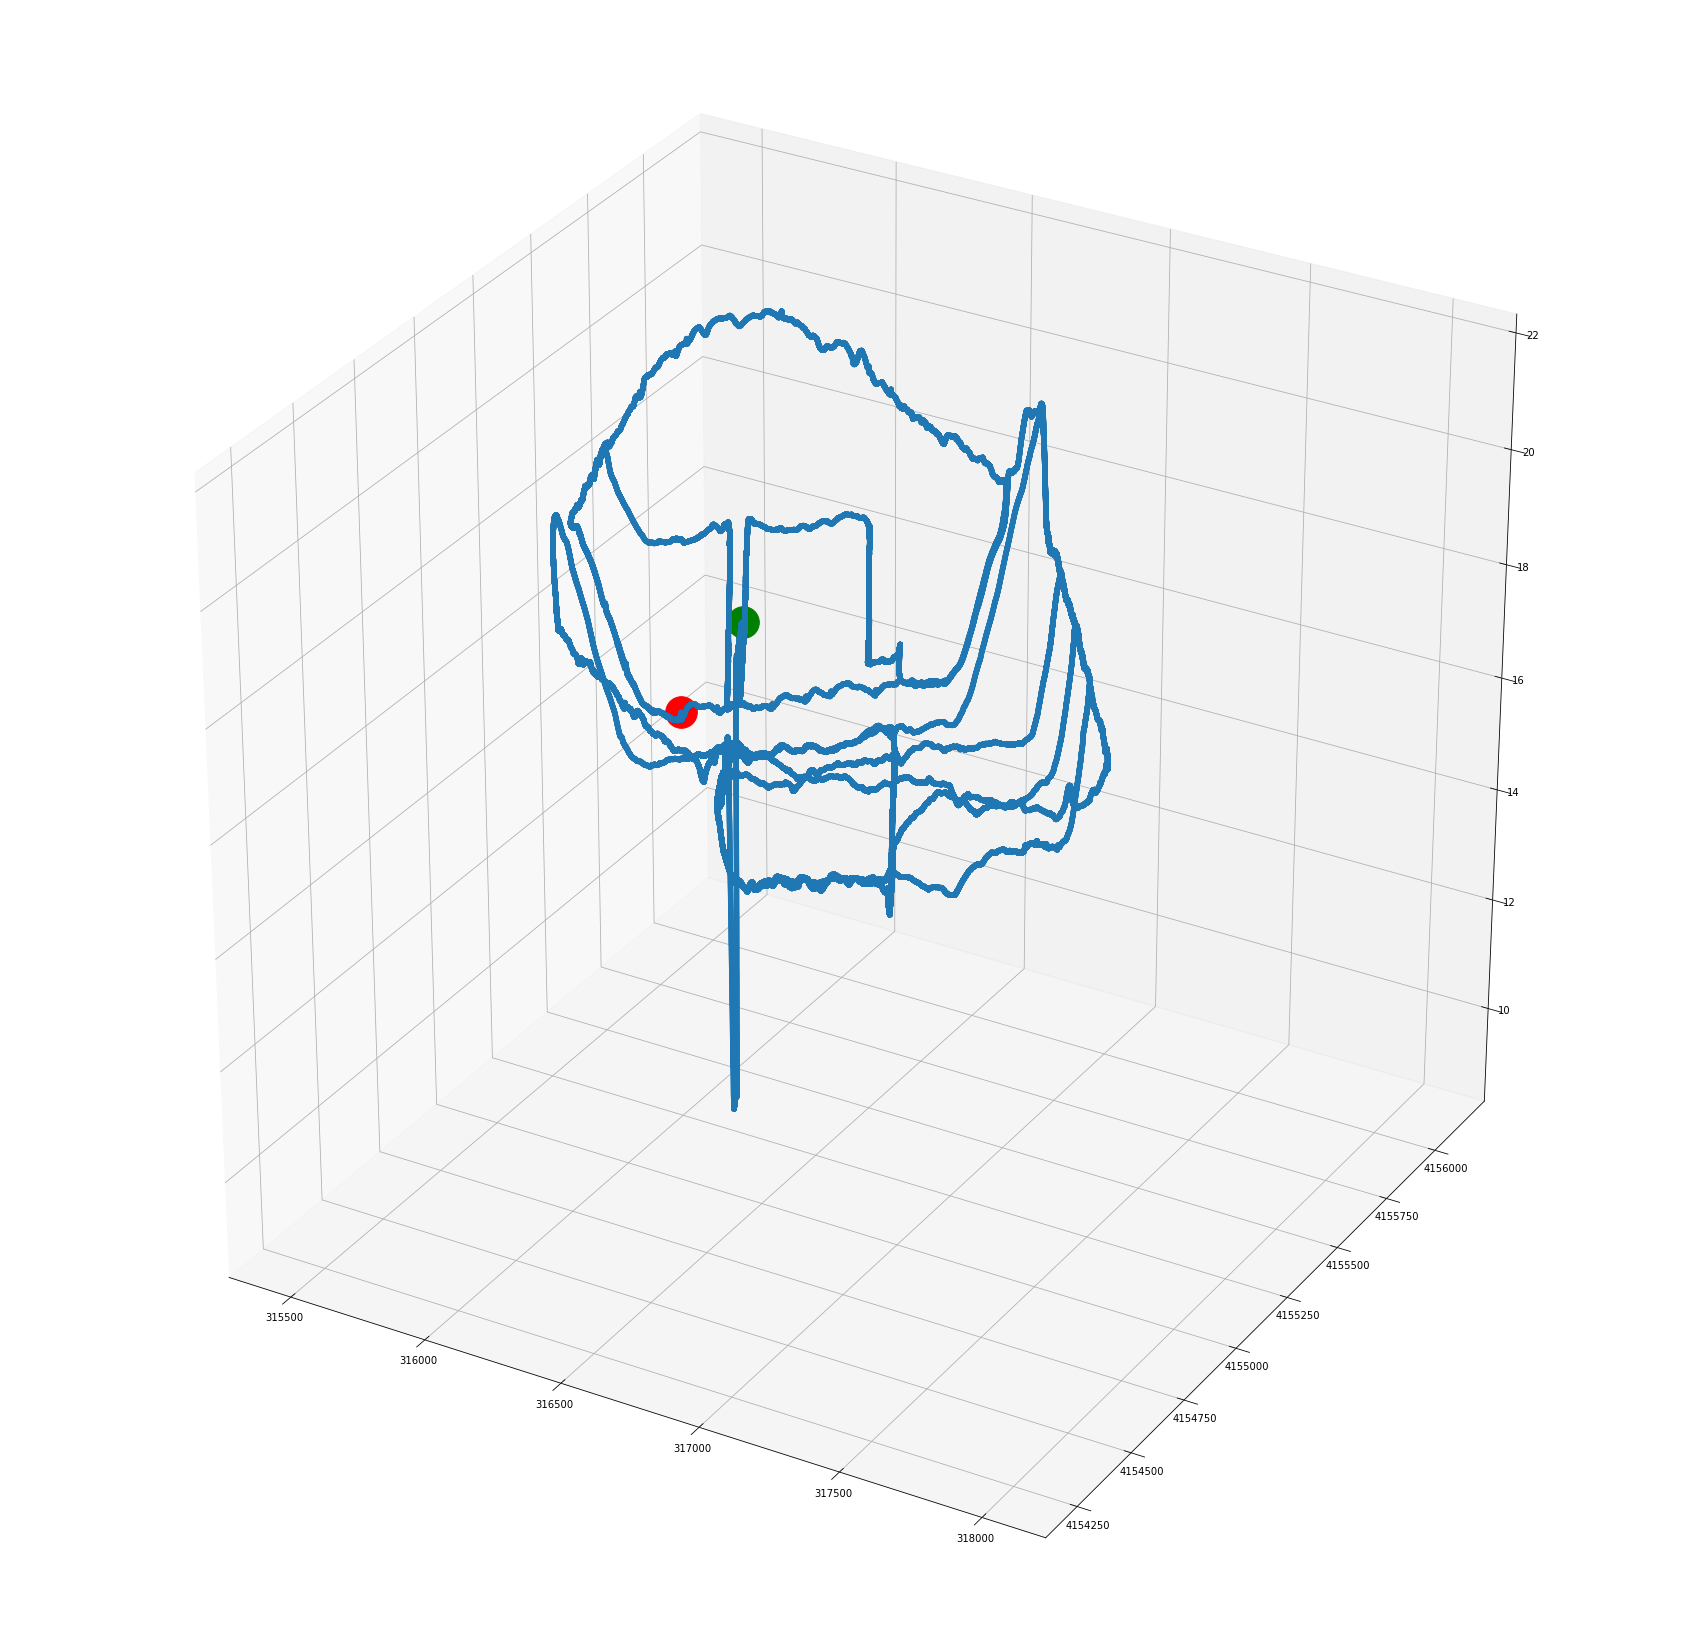

In [147]:
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(projection='3d')
ax.scatter(poses[0,:], poses[1,:], poses[2,:])
ax.scatter(poses[0,:1], poses[1,:1], poses[2,:1], color='red',s=1000)
ax.scatter(poses[0,poses.shape[1]-1:poses.shape[1]],\
           poses[1,poses.shape[1]-1:poses.shape[1]],\
           poses[2,poses.shape[1]-1:poses.shape[1]], color='green',s=1000)
plt.show()

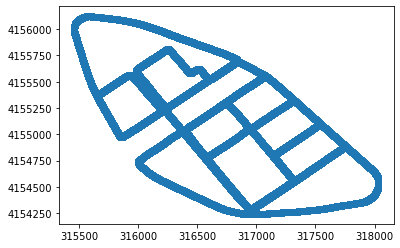

In [148]:
plt.scatter(poses[0,:], poses[1,:])
plt.show()

## Plotting Vehicle Rotations

In [149]:
rot = first_pose.reshape(3,4)[:,:3]

In [150]:
def getEuler(matrix):
    pitch = np.arctan2(matrix[2,1], matrix[2,2])
    roll = np.arcsin(matrix[2,0])
    yaw = -np.arctan2(matrix[1,0], matrix[0,0])
    return np.array([[pitch,roll,yaw]]).T

In [151]:
getEuler(rot)

array([[ 0.00334052],
       [-0.00857178],
       [ 2.49756182]])

In [153]:
n = 300_000
poses = vehicle_pose[:n,1:]
poses = poses.reshape(n, 3,4)
poses = poses[:n, :, :3].T

In [154]:
poses.shape

(3, 3, 300000)

In [155]:
angles = []
for i in range(poses.shape[2]):
    angles.append( getEuler(poses[:,:,i]) )
angles=  np.array(angles)
angles = angles.reshape(angles.shape[0], angles.shape[1])

In [156]:
print(angles.shape)

(300000, 3)


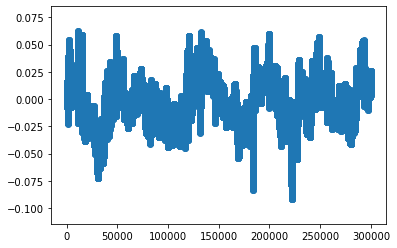

In [157]:
t = np.arange(angles.shape[0])
plt.scatter(t,angles[:,0])
plt.show()

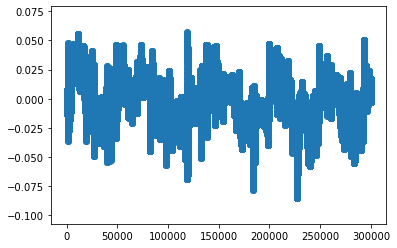

In [158]:
t = np.arange(angles.shape[0])
plt.scatter(t,angles[:,1])
plt.show()

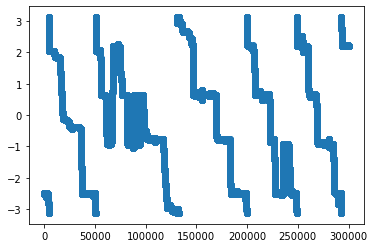

In [159]:
t = np.arange(angles.shape[0])
plt.scatter(t,angles[:,2])
plt.show()